In [1]:
#Import data

import pandas as pd
import numpy as np
import requests
import json

In [6]:
survey=pd.read_csv("survey.csv")
pd.read_csv("survey.csv")


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [15]:
#Clean survey data
survey=survey[(survey["Age"]>20) & (survey ["Age"]<55)]
survey["Gender"]=survey["Gender"].apply(lambda x: "Male" if x.lower()[0]=="m"else"Female")
survey

C:\Users\dasha\AppData\Local\Temp\ipykernel_19768\3084564502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["Gender"]=survey["Gender"].apply(lambda x: "Male" if x.lower()[0]=="m"else"Female")


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [38]:
# Correlation between age and mental health consequence
age_mh=survey[["Age","mental_health_consequence"]]
age_mh["Age Category"]=pd.cut(age_mh["Age"],3,labels=["Young 20-32 yr", "Mid 33-43 yr", "Senior 44-55 yr"])
age_graph=age_mh.groupby(["Age Category","mental_health_consequence"]).count().reset_index()
age_pivot=age_graph.pivot(index="mental_health_consequence",columns="Age Category",values="Age")
age_pivot

C:\Users\dasha\AppData\Local\Temp\ipykernel_19768\1713744189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_mh["Age Category"]=pd.cut(age_mh["Age"],3,labels=["Young 20-32 yr", "Mid 33-43 yr", "Senior 44-55 yr"])


Age Category,Young 20-32 yr,Mid 33-43 yr,Senior 44-55 yr
mental_health_consequence,,,
Maybe,276,168,20
No,286,163,23
Yes,144,113,19


array([<AxesSubplot:ylabel='Young 20-32 yr'>,
       <AxesSubplot:ylabel='Mid 33-43 yr'>,
       <AxesSubplot:ylabel='Senior 44-55 yr'>], dtype=object)

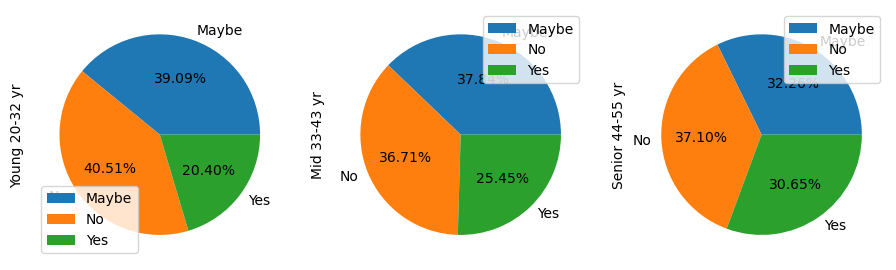

In [39]:
#Pie Chart 
age_pivot.plot.pie(subplots=True,figsize=(11,6),autopct="%1.2f%%")

In [40]:
# Correlation between gender and mental health consequence
gender_mh=survey
gender_graph=gender_mh.groupby(["Gender","mental_health_consequence"]).count().reset_index()
gender_pivot=gender_graph.pivot(index="mental_health_consequence",columns="Gender",values="Age")
gender_pivot

Gender,Female,Male
mental_health_consequence,,
Maybe,112,352
No,74,398
Yes,75,201


array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

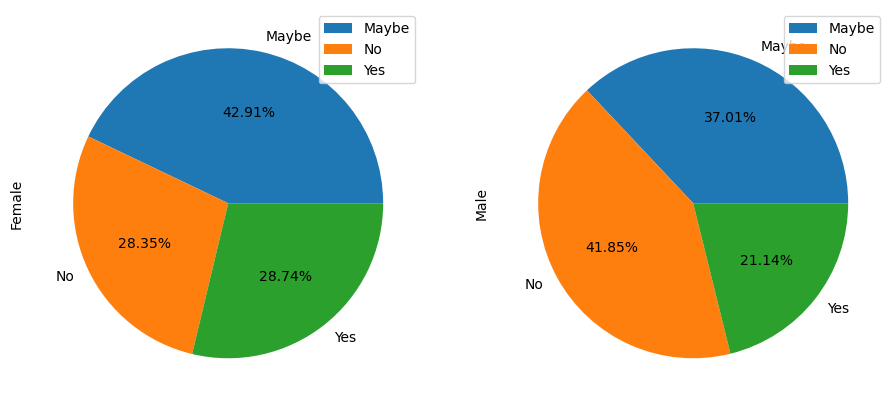

In [41]:
#Graph
gender_pivot.plot.pie(subplots=True,figsize=(11,6),autopct="%1.2f%%")

In [42]:
# Correlation between benefits and mental health consequence
benefits_mh=survey
benefits_graph=benefits_mh.groupby(["benefits","mental_health_consequence"]).count().reset_index()
benefits_pivot=benefits_graph.pivot(index="mental_health_consequence",columns="benefits",values="Age")
benefits_pivot

benefits,Don't know,No,Yes
mental_health_consequence,,,
Maybe,150,121,193
No,168,137,167
Yes,73,105,98


array([<AxesSubplot:ylabel="Don't know">, <AxesSubplot:ylabel='No'>,
       <AxesSubplot:ylabel='Yes'>], dtype=object)

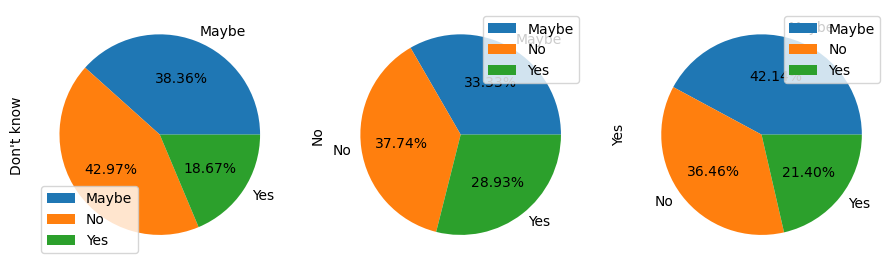

In [43]:
#Graph
benefits_pivot.plot.pie(subplots=True,figsize=(11,6),autopct="%1.2f%%")